In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
Bko = pd.read_csv("F:\Back order prediction\Training_Dataset_v2.csv")

E:\python\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Bko.shape

(1687861, 23)

In [4]:
bko = Bko.sample(n=10000,replace="False")

In [5]:
bko.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
291063,1639054,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.90,0.82,0.0,Yes,No,No,Yes,No,No
292941,1640932,19.0,NaN,0.0,0.0,0.0,0.0,2.0,6.0,8.0,...,0.0,-99.00,-99.00,0.0,No,No,No,No,No,No
1515767,3108492,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.90,0.78,0.0,No,No,No,Yes,No,No
1245184,2826954,2677.0,NaN,0.0,1766.0,3711.0,4885.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
212760,1324317,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.93,0.95,0.0,No,No,No,Yes,No,No


In [6]:
bko.shape

(10000, 23)

In [7]:
bko.isnull().sum()

sku                    0
national_inv           0
lead_time            568
in_transit_qty         0
forecast_3_month       0
forecast_6_month       0
forecast_9_month       0
sales_1_month          0
sales_3_month          0
sales_6_month          0
sales_9_month          0
min_bank               0
potential_issue        0
pieces_past_due        0
perf_6_month_avg       0
perf_12_month_avg      0
local_bo_qty           0
deck_risk              0
oe_constraint          0
ppap_risk              0
stop_auto_buy          0
rev_stop               0
went_on_backorder      0
dtype: int64

In [8]:
bko.drop(["sku"],axis = 1 , inplace = True)  # Dropping the sku ..

In [9]:
bko["lead_time"] = bko["lead_time"].fillna(bko["lead_time"].mean()) ## Filling nas by its mean because it is time ..

In [10]:
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:    
    bko[col]=pd.factorize(bko[col])[0]

In [11]:
bko.head(5)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
291063,3.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.90,0.82,0.0,0,0,0,0,0,0
292941,19.0,7.888995,0.0,0.0,0.0,0.0,2.0,6.0,8.0,13.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
1515767,1.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.90,0.78,0.0,1,0,0,0,0,0
1245184,2677.0,7.888995,0.0,1766.0,3711.0,4885.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,0,0,0
212760,2.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.93,0.95,0.0,1,0,0,0,0,0


In [12]:
bko['perf_12_month_avg'] = bko['perf_12_month_avg'].replace(-99, np.NaN)
bko['perf_12_month_avg'] = bko['perf_12_month_avg'].replace(-99, np.NaN)

In [13]:
#   View count/percentage of missing cells



tot=bko.isnull().sum().sort_values(ascending=False)
perc=(round(100*bko.isnull().sum()/bko.isnull().count(),1)).sort_values(ascending=False)
missing_data = pd.concat([tot, perc], axis=1, keys=['Missing', 'Percent'])
missing_data

,Missing,Percent
perf_12_month_avg,680,6.8
went_on_backorder,0,0.0
sales_9_month,0,0.0
lead_time,0,0.0
in_transit_qty,0,0.0
forecast_3_month,0,0.0
forecast_6_month,0,0.0
forecast_9_month,0,0.0
sales_1_month,0,0.0
sales_3_month,0,0.0


In [14]:
bko = bko.fillna(bko.median(), inplace=True)  #impute the medians

In [15]:
# Checking target variables....

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

In [17]:
#Create independent and Dependent Features
columns = bko.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["went_on_backorder"]]
# Store the variable we are predicting 
target = "went_on_backorder"
# Define a random state 
state = np.random.RandomState(42)
X = bko[columns]
Y = bko[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(10000, 21)
(10000,)


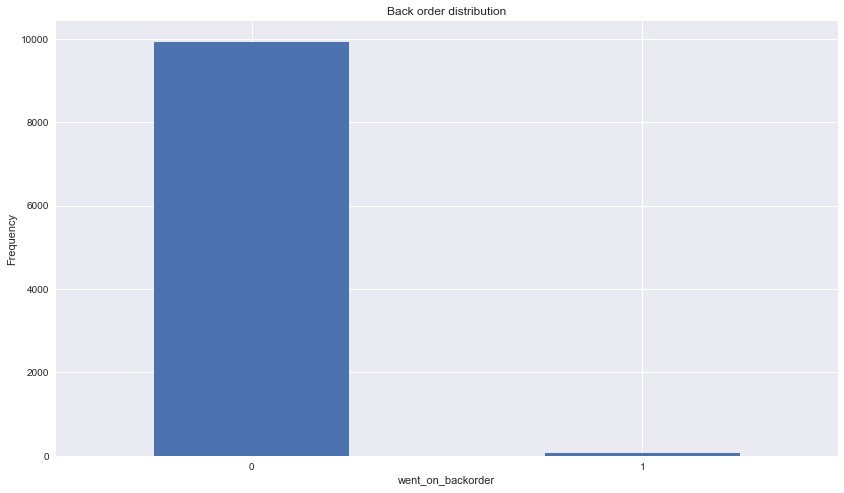

In [18]:
count_classes = pd.value_counts(bko['went_on_backorder'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Back order distribution")

plt.xticks(range(2))

plt.xlabel("went_on_backorder")

plt.ylabel("Frequency")

In [19]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

E:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; 

In [20]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

In [21]:
X.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
291063,3.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.0,0.90,0.82,0.0,0,0,0,0,0
292941,19.0,7.888995,0.0,0.0,0.0,0.0,2.0,6.0,8.0,13.0,...,0,0.0,-99.00,0.83,0.0,1,0,0,1,0
1515767,1.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.90,0.78,0.0,1,0,0,0,0
1245184,2677.0,7.888995,0.0,1766.0,3711.0,4885.0,0.0,0.0,0.0,0.0,...,0,0.0,-99.00,0.83,0.0,1,0,0,0,0
212760,2.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.93,0.95,0.0,1,0,0,0,0


In [22]:
Y.head()

291063     0
292941     0
1515767    0
1245184    0
212760     0
Name: went_on_backorder, dtype: int64

In [23]:
X_res.shape,y_res.shape # Equally sampled X_res and y_res ......

((19866, 21), (19866,))

In [24]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 9934, 1: 66})
Resampled dataset shape Counter({0: 9933, 1: 9933})


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['lead_time', 'sales_1_month', 'min_bank', 'local_bo_qty']
bko[columns_to_scale] = standardScaler.fit_transform(bko[columns_to_scale])

In [26]:
X_res.columns      #y_res

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [27]:
y_res

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19836    1
19837    1
19838    1
19839    1
19840    1
19841    1
19842    1
19843    1
19844    1
19845    1
19846    1
19847    1
19848    1
19849    1
19850    1
19851    1
19852    1
19853    1
19854    1
19855    1
19856    1
19857    1
19858    1
19859    1
19860    1
19861    1
19862    1
19863    1
19864    1
19865    1
Name: went_on_backorder, Length: 19866, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split( 
			X_res, y_res, test_size = 0.3)       ######## Training and Testing the Model ....


In [29]:
X_train.shape

(13906, 21)

In [30]:
y_train.shape

(13906,)

In [31]:
X_test.shape

(5960, 21)

In [32]:
y_test.shape

(5960,)

In [33]:
### Logistic Regression #######

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression().fit(X_train,y_train)

E:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
predict = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [38]:
print(confusion_matrix(y_test,predict))

[[2315  656]
 [ 430 2559]]


In [39]:
print(classification_report(y_test,predict))          #### Gives 81 percent 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2971
           1       0.80      0.86      0.82      2989

    accuracy                           0.82      5960
   macro avg       0.82      0.82      0.82      5960
weighted avg       0.82      0.82      0.82      5960



In [40]:
### For more accuracy we trying to do feature selection with some EDA work ....

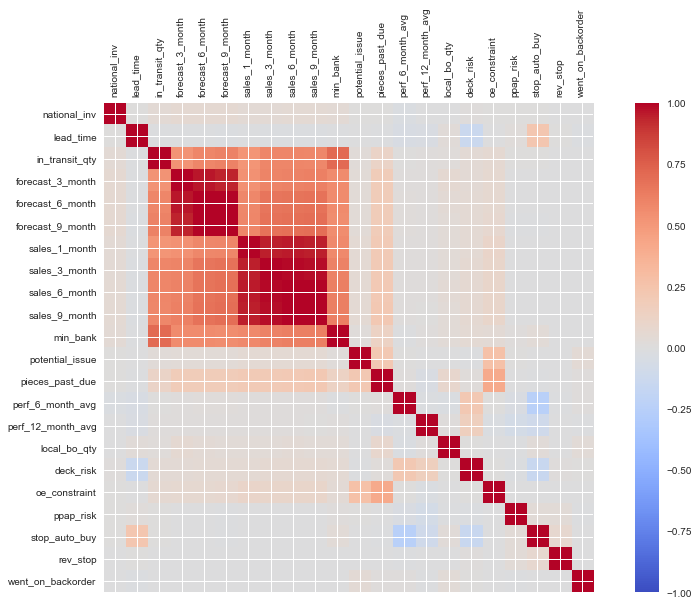

In [42]:
corr=bko.corr()
fig=plt.figure(figsize=(15,9))

ax=fig.add_subplot(111)
cax=ax.matshow(corr,cmap='coolwarm',vmin=-1,vmax=1)
fig.colorbar(cax)

ticks=np.arange(0,len(bko.columns),1)
ax.set_xticks(ticks)

plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(bko.columns)
ax.set_yticklabels(bko.columns)

plt.show()

In [43]:
# From above Corr Plt observed that their are some variables like Forecast 3,6 and 9 months and sales 1,3,6 and 9 are highly corelated.
# So Taking only one of them.

In [44]:
bk1 = bko.drop(['forecast_6_month', 'forecast_9_month' ,'sales_3_month' ,'sales_6_month' , 'sales_9_month' ], axis=1)

In [45]:
bk1.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'sales_1_month', 'min_bank', 'potential_issue', 'pieces_past_due',
       'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty', 'deck_risk',
       'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop',
       'went_on_backorder'],
      dtype='object')

In [51]:
bk1.shape

(10000, 17)

In [ ]:
### Now taking only these columns ....So dropping these columns from X_res 

In [47]:
X_res.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [48]:
X_res = X_res.drop(["forecast_6_month", "forecast_9_month" , "sales_3_month" ,"sales_6_month" , "sales_9_month"], axis =1)

In [49]:
X_res.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'sales_1_month', 'min_bank', 'potential_issue', 'pieces_past_due',
       'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty', 'deck_risk',
       'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [50]:
X_res.shape

(19866, 16)

In [58]:
X_train, X_test, y_train, y_test = train_test_split( 
			X_res, y_res, test_size = 0.2) 

In [60]:
X_train.shape

(15892, 16)

In [61]:
 y_train.shape

(15892,)

In [62]:
X_test.shape

(3974, 16)

In [63]:
y_test.shape

(3974,)

In [64]:
logmodel_1 = LogisticRegression().fit(X_train,y_train)

E:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
predict = logmodel_1.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [67]:
print(confusion_matrix(y_test,predict))

[[1418  575]
 [ 129 1852]]


In [68]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1993
           1       0.76      0.93      0.84      1981

    accuracy                           0.82      3974
   macro avg       0.84      0.82      0.82      3974
weighted avg       0.84      0.82      0.82      3974



In [ ]:
  #### Now it gives 84 % after dropping some features ....

# Random Forest :

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
X_train, X_test, y_train, y_test  =train_test_split( 
			X_res, y_res, test_size = 0.2, random_state = 100 )#train_test_split(x, y, test_size=0.2,random_state=100)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
RandomForest=RandomForestClassifier(max_depth=3)

In [74]:
RandomForest.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [75]:
pred_value=RandomForest.predict(X_test)

In [76]:
df=pd.crosstab(pred_value,y_test)

In [77]:
df

went_on_backorder,0,1
row_0,,
0,1793,36
1,246,1899


In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
tab1=confusion_matrix(pred_value,y_test)

In [80]:
acc=sum(tab1.diagonal())/tab1.sum()*100

In [81]:
acc

92.90387518872673